## Import packages

In [1]:
## import most commonly used packages
import numpy as np
import subprocess
import xarray as xr
from scipy import special

# %matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt

## Define functions

In [2]:
Dp = np.arange(0.01,10,0.001)
N=10000
log_sigma = 0.1
Dpg = 1
n_e = N/(2*np.pi)**0.5/log_sigma*np.exp(-(np.log(Dp)-np.log(Dpg))**2/2/log_sigma**2)
n = N/(2*np.pi)**0.5/Dp/log_sigma*np.exp(-(np.log(Dp)-np.log(Dpg))**2/2/log_sigma**2)

In [3]:
def log_normal_distribution_bins(N,Dpg,log_sigma,bins):
    
    N_cdf = [N/2*(1+special.erf(np.log(_/Dpg)/np.sqrt(2)/log_sigma)) for _ in bins]
    num_bins = len(bins)
    N_bins = [N_cdf[i+1] - N_cdf[i] for i in range(len(bins)-1)]
    N_cdf  = [(N_cdf[i+1] + N_cdf[i])/2 for i in range(len(bins)-1)]
    return N_bins,N_cdf

In [4]:
def aero_linear_distribution_N_S_V(N,Dpg,log_sigma,D):
    
    N_x = [N/(2*np.pi)**0.5/log_sigma/Dp*np.exp(-(np.log(Dp)-np.log(Dpg))**2/2/log_sigma**2) for Dp in D]   
    S_x = [N*np.pi/(2*np.pi)**0.5/log_sigma*Dp*np.exp(-(np.log(Dp)-np.log(Dpg))**2/2/log_sigma**2)  for Dp in D]  
    V_x = [N*np.pi/6/(2*np.pi)**0.5/log_sigma*Dp**2*np.exp(-(np.log(Dp)-np.log(Dpg))**2/2/log_sigma**2)  for Dp in D]  
    
    return N_x,S_x,V_x
def aero_log_distribution_N_S_V(N,Dpg,log_sigma,D):
    
    No_x = [2.303*N/(2*np.pi)**0.5/log_sigma*np.exp(-(np.log(Dp)-np.log(Dpg))**2/2/log_sigma**2) for Dp in D]   
    So_x = [2.303*N*np.pi/(2*np.pi)**0.5/log_sigma*Dp**2*np.exp(-(np.log(Dp)-np.log(Dpg))**2/2/log_sigma**2)  for Dp in D]  
    Vo_x = [2.303*N*np.pi/6/(2*np.pi)**0.5/log_sigma*Dp**3*np.exp(-(np.log(Dp)-np.log(Dpg))**2/2/log_sigma**2)  for Dp in D]  
    
    return No_x,So_x,Vo_x

def aero_exp_distribution_N_S_V(N,Dpg,log_sigma,D):
    
    No_x = [N/(2*np.pi)**0.5/log_sigma*np.exp(-(np.log(Dp)-np.log(Dpg))**2/2/log_sigma**2) for Dp in D]   
    So_x = [N*np.pi/(2*np.pi)**0.5/log_sigma*Dp**2*np.exp(-(np.log(Dp)-np.log(Dpg))**2/2/log_sigma**2)  for Dp in D]  
    Vo_x = [N*np.pi/6/(2*np.pi)**0.5/log_sigma*Dp**3*np.exp(-(np.log(Dp)-np.log(Dpg))**2/2/log_sigma**2)  for Dp in D]  
    
    return No_x,So_x,Vo_x

# 1. a)

In [5]:
bins = [0.00001,0.01,0.05,0.1,0.2,0.4,0.7,1.0,1.5,3,6,60]
N = [21.7, 0.186, 3e-4]
Dpg = [0.138, 0.75, 8.6]
log_sigma = [0.245, 0.3, 0.291]
N_bins = np.empty((3,len(bins)-1))
N_cdf  = np.empty((3,len(bins)-1))
for i in range(3):
    N_bins[i,:], N_cdf[i,:] = log_normal_distribution_bins(N[i],Dpg[i],log_sigma[i],bins)

In [6]:
N_bins = N_bins.sum(axis = 0)
N_cdf = N_cdf.sum(axis = 0)
N_nor = [N_bins[i] /(bins[i+1] - bins[i]) for i in range(len(bins)-1)]

In [7]:
print('  Size (micron) | Concentration | Cumulative | Concertration')
i=0
print("      <0.01     |      {2:8.2f} |   {3:8.2f} |   {4:8.2f}  ".format(bins[i],bins[i+1],N_bins[i],N_cdf[i],N_nor[i]))
for i in range(1,len(bins)-2):
    print("  {0:4.2f}-{1:4.2f}     |  {2:12.2f} |   {3:8.2f} |   {4:8.2f}  ".format(bins[i],bins[i+1],N_bins[i],N_cdf[i],N_nor[i]))
i=i+1
print("      >6.00     |      {2:8.2f} |   {3:8.2f} |   {4:8.2f}  ".format(bins[i],bins[i+1],N_bins[i],N_cdf[i],N_nor[i]))

  Size (micron) | Concentration | Cumulative | Concertration
      <0.01     |          0.00 |       0.00 |       0.00  
  0.01-0.05     |          0.00 |       0.00 |       0.01  
  0.05-0.10     |          2.05 |       1.02 |      40.93  
  0.10-0.20     |         18.24 |      11.17 |     182.44  
  0.20-0.40     |          1.41 |      21.00 |       7.06  
  0.40-0.70     |          0.07 |      21.74 |       0.24  
  0.70-1.00     |          0.08 |      21.82 |       0.26  
  1.00-1.50     |          0.03 |      21.87 |       0.06  
  1.50-3.00     |          0.00 |      21.89 |       0.00  
  3.00-6.00     |          0.00 |      21.89 |       0.00  
      >6.00     |          0.00 |      21.89 |       0.00  


# 1. b)


(0.005, 10)

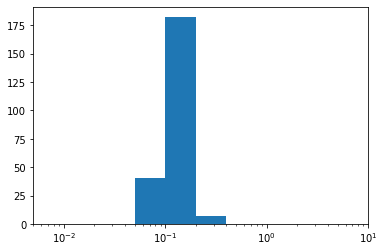

In [8]:
plt.bar([bins[i+1]/2 + bins[i]/2 for i in range(len(bins)-1)],
        N_nor,
       [bins[i+1] -  bins[i] for i in range(len(bins)-1)])
plt.xscale('log')
plt.xlim(0.005,10)

# 1. c)
Use eq(8.48) and eq(8.51)

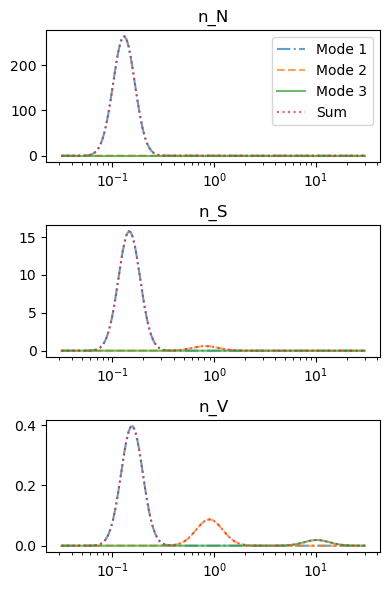

In [9]:
log10D = np.arange(-1.5,1.5,0.02)
D = [np.exp(2.303*_) for _ in log10D]

N_x = np.zeros((4,len(D)))
S_x = np.zeros((4,len(D)))
V_x = np.zeros((4,len(D)))
for i in range(3):
    N_x[i],S_x[i],V_x[i] = aero_linear_distribution_N_S_V(N[i],Dpg[i],log_sigma[i],D)
i=3
N_x[i],S_x[i],V_x[i] = N_x.sum(axis=0),S_x.sum(axis=0),V_x.sum(axis=0)

fig1 = plt.figure(figsize=(4,6),dpi=100)
ax1 = fig1.add_subplot(3,1,1)
lab = ['Mode 1','Mode 2','Mode 3','Sum']
ls = ['-.','--','-',':']
for i in range(4):
    ax1.plot(D,N_x[i],linestyle=ls[i],label=lab[i],alpha=0.7)
plt.xscale('log')
ax1.legend()
plt.title('n_N')
ax2 = fig1.add_subplot(3,1,2)
for i in range(4):
    ax2.plot(D,S_x[i],linestyle=ls[i],label=lab[i],alpha=0.7)
plt.xscale('log')
plt.title('n_S')
    
ax3 = fig1.add_subplot(3,1,3)
for i in range(4):
    ax3.plot(D,V_x[i],linestyle=ls[i],label=lab[i],alpha=0.7)
plt.xscale('log')
plt.title('n_V')

plt.tight_layout()
plt.show()

# 1. d)
Use eq(8.48),  eq(8.51), eq(8.18), eq(8.19) and eq(8.20)

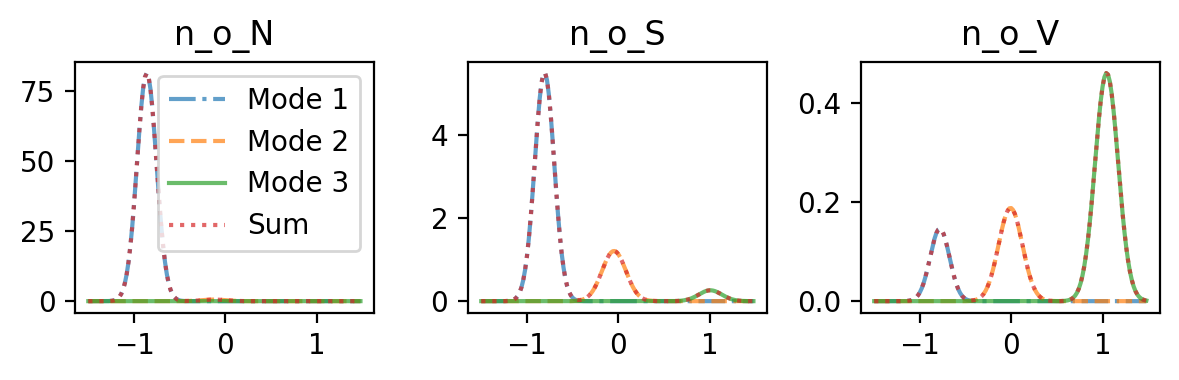

In [14]:
log10D = np.arange(-1.5,1.5,0.02)
D = [np.exp(2.303*_) for _ in log10D]

No_x = np.zeros((4,len(D)))
So_x = np.zeros((4,len(D)))
Vo_x = np.zeros((4,len(D)))
for i in range(3):
    No_x[i],So_x[i],Vo_x[i] = aero_log_distribution_N_S_V(N[i],Dpg[i],log_sigma[i],D)
i=3
No_x[i],So_x[i],Vo_x[i] = No_x.sum(axis=0),So_x.sum(axis=0),Vo_x.sum(axis=0)

fig1 = plt.figure(figsize=(6,2),dpi=200)
ax1 = fig1.add_subplot(1,3,1)
lab = ['Mode 1','Mode 2','Mode 3','Sum']
ls = ['-.','--','-',':']
for i in range(4):
    ax1.plot(log10D,No_x[i],linestyle=ls[i],label=lab[i],alpha=0.7)
# plt.xscale('log')
ax1.legend()
plt.title('n_o_N')
ax2 = fig1.add_subplot(1,3,2)
for i in range(4):
    ax2.plot(log10D,So_x[i],linestyle=ls[i],label=lab[i],alpha=0.7)
# plt.xscale('log')
plt.title('n_o_S')
    
ax3 = fig1.add_subplot(1,3,3)
for i in range(4):
    ax3.plot(log10D,Vo_x[i],linestyle=ls[i],label=lab[i],alpha=0.7)
# plt.xscale('log')
plt.title('n_o_V')

plt.tight_layout()
plt.show()

In [17]:
for i in range(3):
    print(Dpg[i]*np.exp(0.5*log_sigma[i]**2))

0.14220450323076603
0.7845208949315376
8.971946945145525


# 1. e)

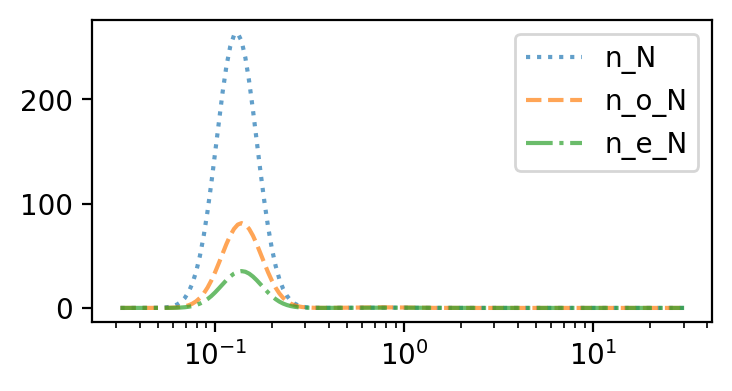

In [13]:
log10D = np.arange(-1.5,1.5,0.02)
D = [np.exp(2.303*_) for _ in log10D]

Ne_x = np.zeros((4,len(D)))
Se_x = np.zeros((4,len(D)))
Ve_x = np.zeros((4,len(D)))
for i in range(3):
    Ne_x[i],Se_x[i],Ve_x[i] = aero_exp_distribution_N_S_V(N[i],Dpg[i],log_sigma[i],D)
i=3
Ne_x[i],Se_x[i],Ve_x[i] = Ne_x.sum(axis=0),Se_x.sum(axis=0),Ve_x.sum(axis=0)
fig1 = plt.figure(figsize=(4,2),dpi=200)
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(D,N_x[3,:],label='n_N',linestyle =':',alpha=0.7)
ax1.plot(D,No_x[3,:],label='n_o_N',linestyle ='--',alpha=0.7)
ax1.plot(D,Ne_x[3,:],label='n_e_N',linestyle ='-.',alpha=0.7)
plt.xscale('log')
ax1.legend()
# plt.xlim(0.05,0.5)
plt.show()

They are different because of the defination of the unit (how to normalize). The eq(8.18-23) give the relationship between them.

# 2

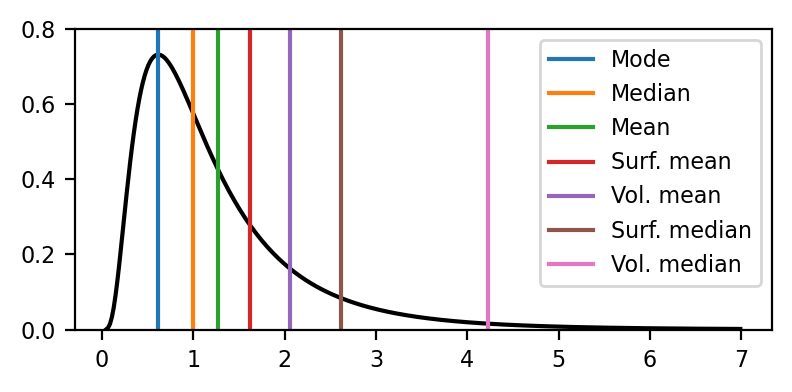

In [42]:
D =  np.arange(0.05,7,0.02)
Dpg = 1
sigam = 2
N,S,V = aero_linear_distribution_N_S_V(1,Dpg,np.log(sigam),D)
lab_nu = ['Mode','Median','Mean','Surf. mean','Vol. mean','Surf. median','Vol. median']
nu     = [-1,0,0.5,1,1.5,2,3]
Dpv    = [Dpg*np.exp(_ * np.log(sigam)**2) for _ in nu]

plt.rcParams.update({'font.size': 8})
fig1 = plt.figure(figsize=(4,2),dpi=200)
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(D,N,c='black')
# plt.xscale('log')
for i,_ in enumerate(Dpv):
    ax1.plot([_,_],[0,0.88],label = lab_nu[i])

ax1.legend()
plt.ylim(0,0.8)
plt.tight_layout()
plt.show()